#Campus Recruitment Prediction With Machine Learning for MBA Students


 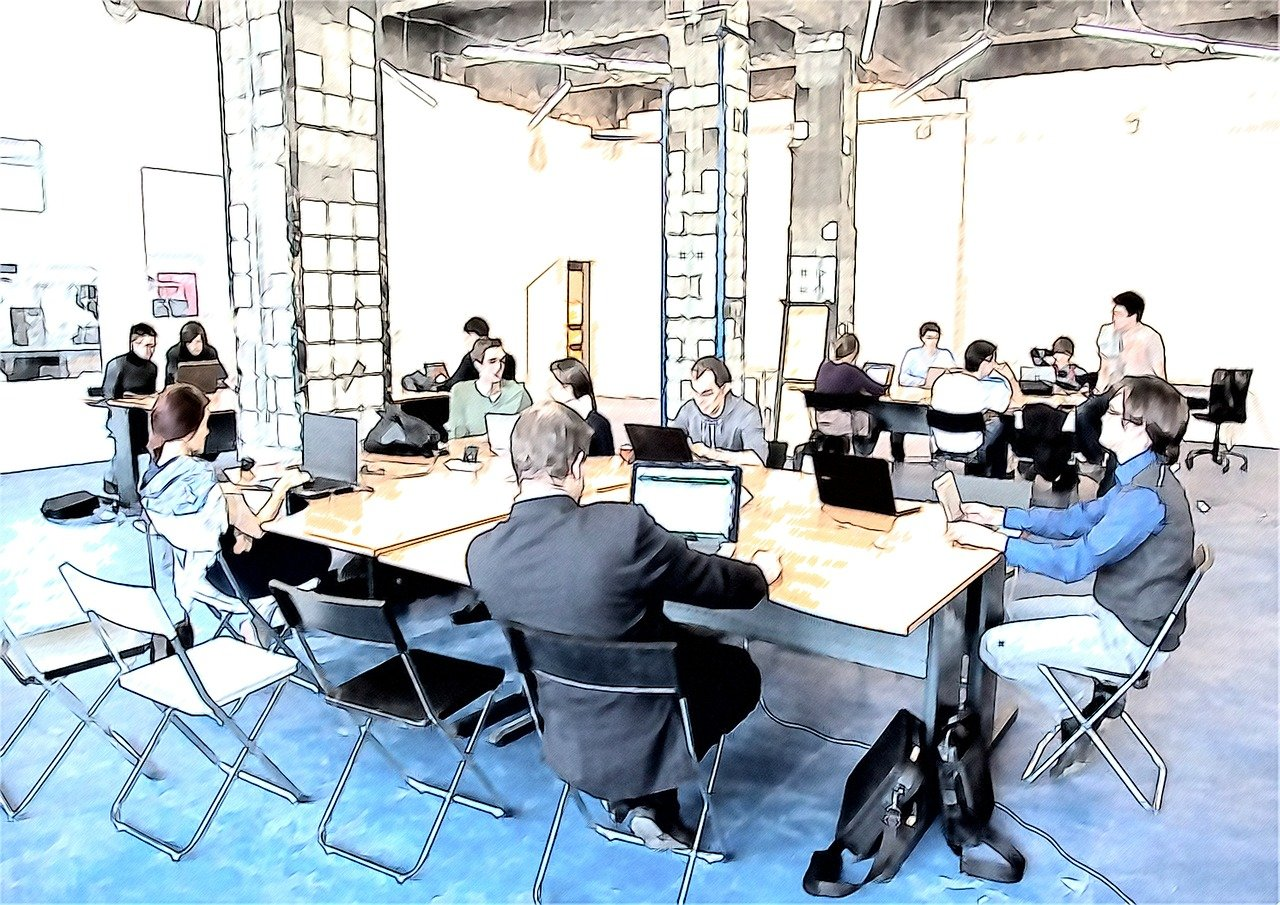

**Student Name:** <br>
**Registration Number:** <br>

In this project we are going to utilize the **Campus Recruitment** Dataset from Kaggle which consisit of various features which might influence the Placement of Student in Jobs.

Data Link: https://www.kaggle.com/datasets/benroshan/factors-affecting-campus-placement/data

There are alltogether 14 features and the target variable (Status). A description of the target dataset features have been provided below.

* sl_no:Serial Number
* gender: Gender- Male='M',Female='F'
* ssc_p: Secondary Education percentage- 10th Grade
* ssc_b: Board of Education- Central/ Others
* hsc_p: Higher Secondary Education percentage- 12th Grade
* hsc_b: Board of Education- Central/ Others
* hsc_s: Specialization in Higher Secondary Education
* degree_p: Degree Percentage
* degree_t: Under Graduation(Degree type)- Field of degree education
* workex: Work Experience
* etest_p: Employability test percentage (conducted by college)
* specialisation: Post Graduation(MBA)- Specialization
* mba_p: MBA percentage
* status: Status of placement- Placed/Not placed
* salary: Salary offered by corporate to candidates

So, in this task, we are starting with the Exploratory Data Analysis (EDA) and progress towards the data preprocessing and finally implementing machine learning models to predict student placements in corporations.

**Please take the following points into consideration while completing the assignment and during the submission**

1. It is recommended to use Google Colab or Jupyer notebook (hosted in anaconda framework) to complete this assignment.
2. Submit the downloaded Jupyter notebook (.ipynb) from the Colab or Jupyter notebook along with results on or before the deadline (Results including plots, tables/dataframes, printed values and text explanations should be visible along with your code. If you are fail to save the document in such a way no marks will be given for such sections). **Furthermore, assignments subitted after the deadline will not consider for grading**.
3. In adddition to that submit the generated .pdf file of the notebook after running all the code blocks (Hint: If colab shows distortions in the generated pdf try to generate the pdf with Jupyter Notebook in Anaconda; makesure that your comments are completely visible).
4. Results and explanations should be clearly visible in both documents.
5. You should submit a .zip file with .ipynb file and .pdf file of the notebook.
6. Rename the zipfile as **EE5253_Assignment_EG20YYXXXX** (YY = Registration Year, XXXX = Student Registration Number)


**Note: Each plot in this assigment needs to be formatted in proper way (i.e., plot titles, axis titles, etc. should be added accordingly)**

## Load the Necessary Libraries

In [2]:
# Load the necessary libraries here
# If you are not sure what to be impored at the moment please start proceding with the upcoming tasks and import the libraries later
# according to the requirements

# Hint: You may need matplotlib and seaborn libraries for data visualization
# Hint: Think about what the libraries need in order to load a .csv file and process it

# Your code goes here

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns


## Data Loading

In [3]:
# Add the dataset into the Colab runtime and load the dataset as a Pandas dataframe.
# If you are running jupyer notebook in your local anaconda virtual environment provide the correct path to
# load the data.

# using pandas to read the csv file
df = pd.read_csv("Placement_Data_Full_Class.csv")

# Your code goes here

# Print the first five rows of the loaded dataframe

# Your code goes here

df.head()


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
# Since the sl_no feature just indicating the index of the each data point you may drop the column

# Your code goes here

df.drop('sl_no', axis=1, inplace=True)

## Exploratory Data Analysis (EDA)

In [5]:
# Identify the shape of the loaded dataframe

# Your code goes here

df.shape

(215, 14)

In [6]:
# Print a concise summary of the pandas dataframe

# Hint: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html

# Your code goes here

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB


**Q:** Based on the printed summary identify what are the categorical and numerical features of the dataset. Please note them down below. <br>
> **A:**

>Numerical Features: <br>
ssc_p, hsc_p, degree_p, etest_p, mba_p, salary <br>
>Categorical Features: <br>
gender, ssc_b, hsc_b, hsc_s, degree_t, workex, specialisation, status





In [7]:
# Generate descriptive analytics for the numerical features in the dataset

# Hint: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

# Your code goes here

df.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


### Data Visualization



In the following section we are going to do some visualization in the dataset.

**Q:**In this case we are going to split the dataset into train and test sets and utilize only the train set for the visualizations. What should be the reason?<br>
> **A:** 

> We should split the dataset into train and test sets and utilize only the train set for the visualizations because we want to avoid data leakage. If we use the test set for visualization, we might get a biased view of the data and this might lead to wrong conclusions.

In [8]:
# Split the dataset into train and test sets
# Make sure to separate independent and dependent variables as well

# Your code goes here

from sklearn.model_selection import train_test_split

X = df.drop('status', axis=1)

y = df['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [9]:
# Print number of training data points

# Your code goes here

X_train.shape

(150, 13)

In [10]:
# Print number of testing data points

# Your code goes here

X_test.shape

(65, 13)

<Axes: xlabel='status', ylabel='count'>

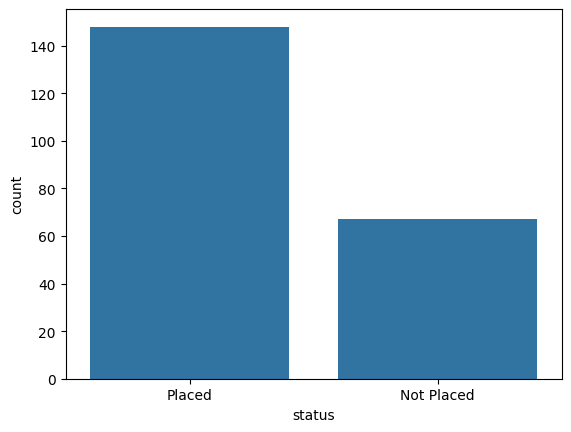

In [11]:
# Print the counts of status (the target variable) using seaborn countplot
# Hint: https://seaborn.pydata.org/generated/seaborn.countplot.html

# Your code goes here

sns.countplot(x='status', data=df)



**Q:** Can you recognize that the dataset is imbalnaced? Mention three problems of imbalnced dataset may cause during the machine learning model traning. <br>
> **A:** Yes<br>
1. Model is tends to overly biased towards the majority class. In here (Placed )<br>   
2. Accuracy metrics would be misleading because it calculate the accuracy without accounting errors in minority class.<br>
3. We cannot make sure model learned the patterns of the minority class due to less count. So predictive abilties are reduced<br>



<Axes: xlabel='gender', ylabel='count'>

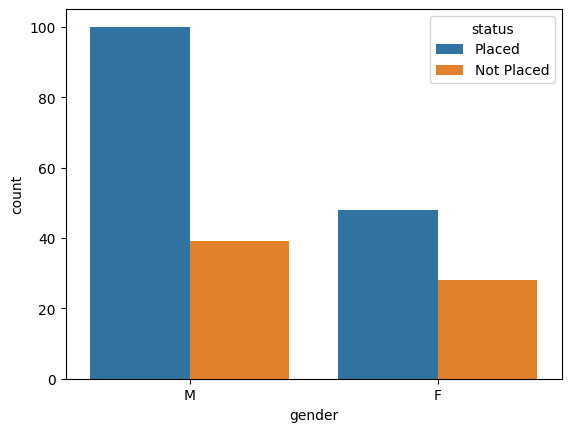

In [12]:
# Plot the recruiment status of the population based on Gender
# Hint: Set the hue parameter accordingly

# Your code goes here

sns.countplot(x='gender', hue='status', data=df)




**Q:** Explain the observation from the above table.
> **A:**
-There are more males represented in dataset that Females so it's imbalanced gender wise. <br>
-In males more percentage is placed than not placed. <br>
-But in females placed count is low overall but ratio between placed and not placed is more balanced than males.<br>

<Axes: xlabel='specialisation', ylabel='count'>

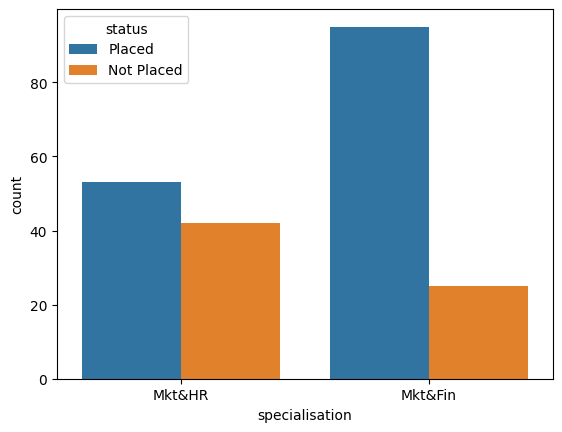

In [48]:
# Plot the recruiment status of the population based on the post gradute specialisation

# Your code goes here

#unique values in specialisation column

df['specialisation'].unique()
#array(['Mkt&HR', 'Mkt&Fin'], dtype=object)

sns.countplot(x='specialisation', hue='status', data=df)


**Q:** Inteprete the above results.
> **A:**
From this we can see if a student specialized in Marketing and Finance, he/she has a higher chance of getting placed than a student who specialized in Marketing and HR. <br>
If students did postgraduation as Marketing and Finance they have a advantage or more favor in getting placed. <br>

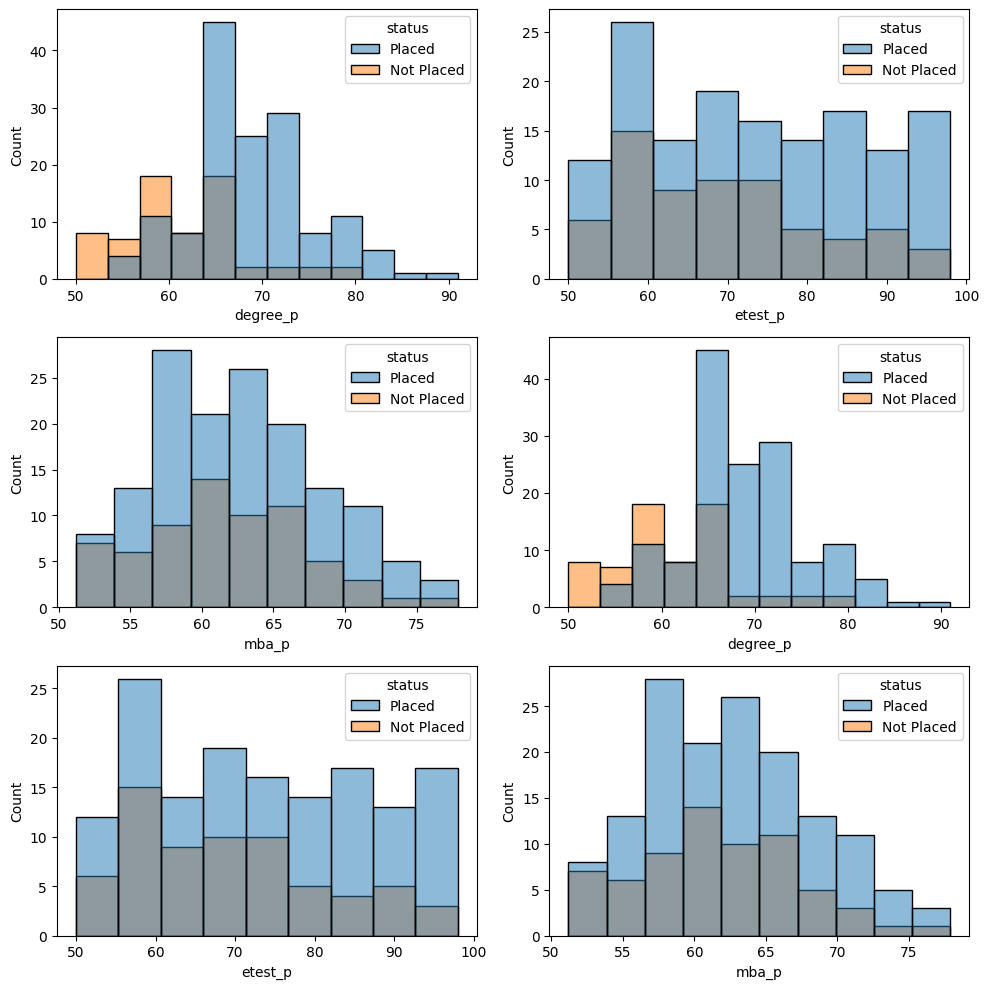

In [14]:
# Plot the distribution of degree percentage, employbility test percentage and, MBA percentage on three histograms in the same figure
# Hint: Use subplots (Add the subplots into one column of the figure)
# Hint: https://seaborn.pydata.org/generated/seaborn.histplot.html

# Your code goes here

# Add seperate column to the subplots and plot same figures based on the placement state
# Make sure to plot the all six plots in the same figure.

# Your code goes here

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))

sns.histplot(x='degree_p', hue='status', data=df, ax=axes[0, 0])

sns.histplot(x='etest_p', hue='status', data=df, ax=axes[0, 1])

sns.histplot(x='mba_p', hue='status', data=df, ax=axes[1, 0])

sns.histplot(x='degree_p', hue='status', data=df, ax=axes[1, 1])

sns.histplot(x='etest_p', hue='status', data=df, ax=axes[2, 0])

sns.histplot(x='mba_p', hue='status', data=df, ax=axes[2, 1])

plt.tight_layout()



**Q:** Summarize the visualizations in the above six plots.<br>
> **A:**

In [15]:
# Check for the null values in train set

# Your code goes here

X_train.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
salary            47
dtype: int64

In [16]:
# Check for the null values in test set

# Your code goes here

X_test.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
salary            20
dtype: int64

<Axes: >

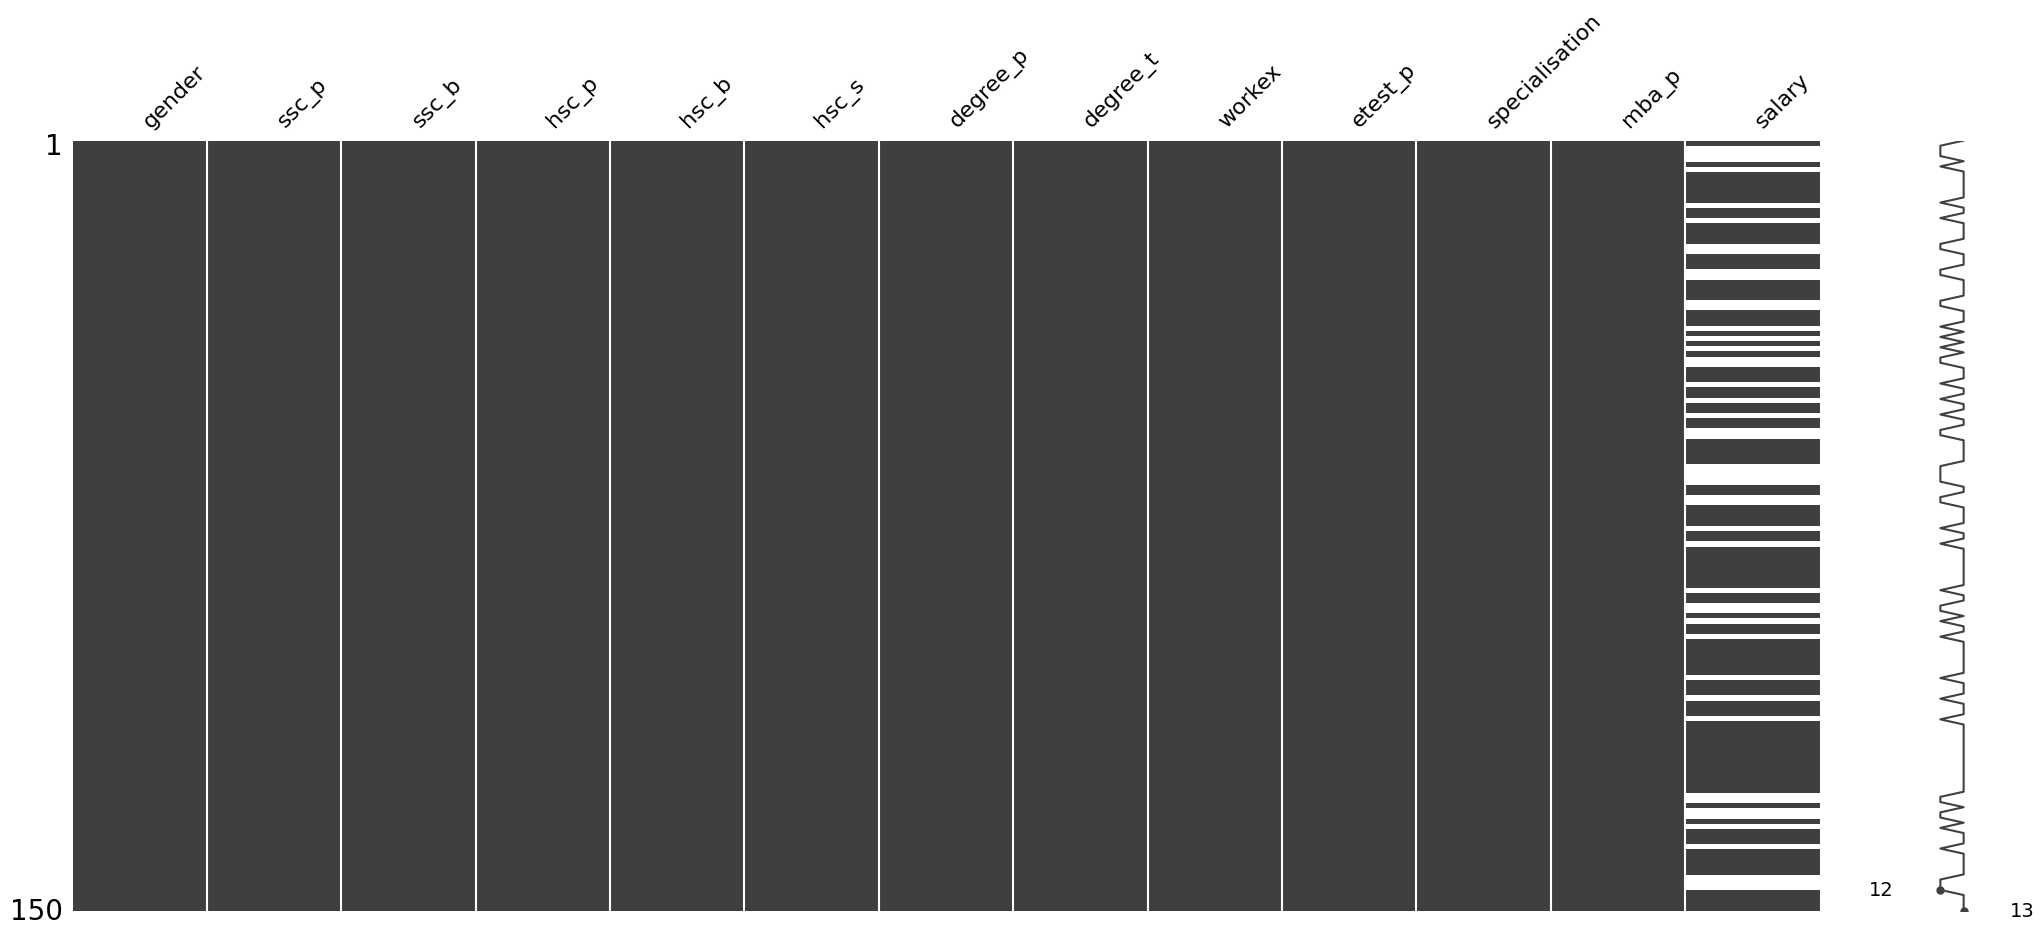

In [17]:
# Display the missing values in the train set using matrix plot
# Hint: https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009

# Your code goes here


import missingno as msno

msno.matrix(X_train)



## Data Preprocessing

### Handle the Missing Data

**Q:**Given the task "Prediction of Placements of Campus Students (Target Variable: status - Status of placement- Placed/Not placed)" propose a method to handle the missing data in this problem and implement that accordingly. Defend your proposed method for handling the missing data (**Hint:** Observe the matrix plot generated above identify where these missing values are located).
> **A:**


In [18]:
# Handle the missing data

# Your code goes here

X_train['salary'].fillna(X_train['salary'].mean(), inplace=True)

In [19]:
# Test the training dataset after processing the null values

# Your code goes here

X_train.isnull().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
salary            0
dtype: int64

In [20]:
# Process the null values in the test set

# Your code goes here

X_test['salary'].fillna(X_test['salary'].mean(), inplace=True)

In [21]:
# Test the testing dataset after processing the null values

# Your code goes here

X_test.isnull().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
salary            0
dtype: int64

### Handle the categorical features

**Q:** Select an appropriate method to encode the categorical features. Explain your selection and incorporated methodology to be followed in categorical feature handling (i.e., if you are going to use some specific parameters or techniques reason about them accordingly).
> **A:**

In [22]:
# Hint: Use Scikit-Learn library for the feature encoding

# Your code goes here

# List the categorical features

# Your code goes here

# Define the encoder
# Hint: https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html

# Your code goes here

# Encode the training features

# Your code goes here

In [23]:
# Check the datatypes of the the Pandas dataframe after the transformation

# Your code goes here

In [24]:
# Encode the testing features

# Your code goes here

In [25]:
# Encode the target variable in train and test sets

# Your code goes here

In [26]:
# Print the encoded labels for the training set

# Your code goes here

### Scale the Numerical Features

In [27]:
# Standard Scale the numerical features

In [28]:
# Display the head of the scaled training set

In [29]:
# Display the head of the scaled testing set

From the EDA you should have observed that dataset is imbalanced. Therefore, in the following section we are going to handle the imbalance nature of the dataset using the technique calle **SMOTE (Synthetic Minority Over-sampling Technique)**. SMOTE has been included with the imbalanced-learn library.

Link to Imbalanced-Learn Library: https://imbalanced-learn.org/stable/user_guide.html#user-guide

### Handling the Imbalance Nature of the Dataset

**Q:** Explain the SMOTE algorithem. What is the basic advantage of using SMOTE over other oversampling techniques.<br>
> **A1:**<br>
> **A2 (Advantage):**

In [30]:
# Oversample the training set
# Makesure to save the oversampled data to seperate variables since we will need the original data points at a later point of the
# model development
# Hint: https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

# Your code goes here

In [31]:
# plot the count plots side by side before and after resampling

# Your code goes here

As it can be seen from the above plot the the SMOTE has balanced the traning dataset by oversampling the minority class. <br>
**Q:** Are we going to oversample the testing set as well? Explain your point of view.
> **A:**

The above generated oversampled dataset is only for the visualization of the functionality of the SMOTE algorithm and the machine learning model development will be done by means of imbalanced-learn pipeline (Ref: https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) along with Stratified K-Folds cross-validation (Ref: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html) and GridSearchCV (Ref: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to avoid any data leackages during the training process. Proceed with the given instructions in the following section to implement a Support Vector Classifer in proper way.

## Machine Learning Model Development: Placement Prediction with Support Vector Classifier

In [32]:
# Make sure you have loaded the necessary libaries here or in a point before

# Your code goes here

In [33]:
# Define imbpipeline with following steps,
## SMOTE
## classifier (SVC in this case)

# Your code goes here

In [34]:
# Define stratified k-fold cross validation with five folds

# Your code goes here

**Q:** What is the importance of Stratified K-Folds cross-validation?
> **A:**

In [35]:
# Define parameter grid with two to three hyper parameters to perform grid search

# Your code goes here

In [36]:
# Define grid seach instance with GridSearchCV from Scikit-Learn

# Your code goes here

In [37]:
# fit the grid search instance to the training data
# Do not use the upsampled train dataset before.
# Use the imbalanced dataset

# Your code goes here

Hint: Refer to the GridSearchCV documentation in Scikit-Learn site to answer the following questions.

In [38]:
# Print the mean cross validated score of the best estimator (Accuracy)

# Your code goes here

In [39]:
# Print the best hyper parameters detected from the grid search

# Your code goes here

In [40]:
# Obtain the best estimator selected from the grid search

# Your code goes here

### Model Evaluation

In [41]:
# Fit the best estimator to the whole training dataset

# Your code goes here

In [42]:
# Calculate the accuracy considering the complete traing set

# Your code goes here

In [43]:
# Calculate the accuracy for the test set

# Your code goes here

**Q:** Comment on the accuracies obtained above. Do you think this model is overfitting or not? <br>
> **A:**

In [44]:
# Generate the confusion matrix for the train and test sets and plot them in the same figure side by side

# Your code goes here

**Q:** Comment about the obtained confusion matrices. <br>
> **A:**

In [45]:
# Generate the classification report from Scikit-Learn for the test set

# Your code goes here

**Q:** Comment on the results obtained with classfication report. Explain the different parameters you can observe in the report.
> **A:**

In [46]:
# Generate the ROC (Receiver Operating Curve) for the estimator considering the test data
# Also print the Area Under Curve (AUC) value asscoiated with ROC curve

# Your code goes here

**Q:** What is ROC curve and AUC value? Furthermore comment on the obtained ROC curve and AUC value. What can you tell on the estmator based on the obtained ROC curve and AUC value?
> **A:**